In [297]:
import mysql.connector
from mysql.connector import errorcode
import psycopg2 as pg

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
DATABASE = 'stage'

if DATABASE == 'prod':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'intelligenttrading-aurora-production-primary-cluster.cluster-caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '3306',
      'database': 'intelligenttrading_primary',
      'raise_on_warnings': True,
    }
    try:
      db_connection = mysql.connector.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
        
elif DATABASE == 'stage':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'intelligenttrading-aurora-production-postgres-cluster.cluster-caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '5432',
      'dbname': 'primary_postgres'
    }

    try:
      db_connection = pg.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
    


In [307]:
#del(df_eth60)
query_eth60 = (" SELECT * FROM indicator_priceresampled WHERE period=60 AND coin='ETH' " )
df_eth60 = pd.read_sql(query_eth60, con=db_connection)

# make index a timestamp relative_strength
df_eth60['timestamp'] = pd.to_datetime(df_eth60['timestamp'], unit='s')
df_eth60.index = pd.DatetimeIndex(df_eth60.timestamp)

df_eth60['max_price_satoshis'] = df_eth60['max_price_satoshis'] * 10 ** -8
df_eth60['mean_price_satoshis'] = df_eth60['mean_price_satoshis'] * 10 ** -8
df_eth60['SMA50_satoshis'] = df_eth60['SMA50_satoshis'] * 10 ** -8
df_eth60['SMA200_satoshis'] = df_eth60['SMA200_satoshis'] * 10 ** -8

df_eth60['relative_strength'] = 100.0 - (100.0 / (1.0 + df_eth60['relative_strength']))    




In [308]:
df_print = df_eth60.tail(48)
print(df_print.head(1).index)
print(df_print.tail(1).index)

DatetimeIndex(['2017-12-05 10:37:21.726250'], dtype='datetime64[ns]', name='timestamp', freq=None)
DatetimeIndex(['2017-12-07 19:54:51.808330'], dtype='datetime64[ns]', name='timestamp', freq=None)


In [309]:
df_print

,id,source,coin,timestamp,period,mean_price_satoshis,min_price_satoshis,max_price_satoshis,SMA50_satoshis,SMA200_satoshis,EMA200_satoshis,EMA50_satoshis,relative_strength
timestamp,,,,,,,,,,,,,
2017-12-05 10:37:21.726250000,51214,0,ETH,2017-12-05 10:37:21.726250000,60,0.039574,3941304,0.039760,0.039559,0.039591,4013156.0,3973180.0,28.399516
2017-12-05 10:43:32.507050000,51244,0,ETH,2017-12-05 10:43:32.507050000,60,0.039580,3941304,0.039760,0.039568,0.039589,4012608.0,3972586.0,31.162779
2017-12-05 10:49:43.616550000,51274,0,ETH,2017-12-05 10:49:43.616550000,60,0.039579,3940196,0.039760,0.039572,0.039588,4012064.0,3972010.0,30.905274
2017-12-05 10:55:55.851670000,51310,0,ETH,2017-12-05 10:55:55.851670000,60,0.039575,3940196,0.039760,0.039575,0.039586,4011521.0,3971443.0,30.165845
2017-12-05 11:02:09.638940000,51340,0,ETH,2017-12-05 11:02:09.638940000,60,0.039574,3940196,0.039760,0.039576,0.039583,4010982.0,3970891.0,29.866613
2017-12-05 11:08:26.539550000,51370,0,ETH,2017-12-05 11:08:26.539550000,60,0.039579,3940003,0.039760,0.039578,0.039580,4010455.0,3970383.0,32.546350
2017-12-05 11:13:39.059040000,51400,0,ETH,2017-12-05 11:13:39.059040000,60,0.039567,3940003,0.039760,0.039575,0.039575,4009920.0,3969846.0,29.757063
2017-12-05 12:19:47.049400000,51442,0,ETH,2017-12-05 12:19:47.049400000,60,0.039426,3925000,0.039557,0.039701,0.040158,4009250.0,3968779.0,14.586613
2017-12-05 13:20:05.086330000,51472,0,ETH,2017-12-05 13:20:05.086330000,60,0.038995,3875613,0.039349,0.039682,0.040150,4008158.0,3966062.0,5.449357


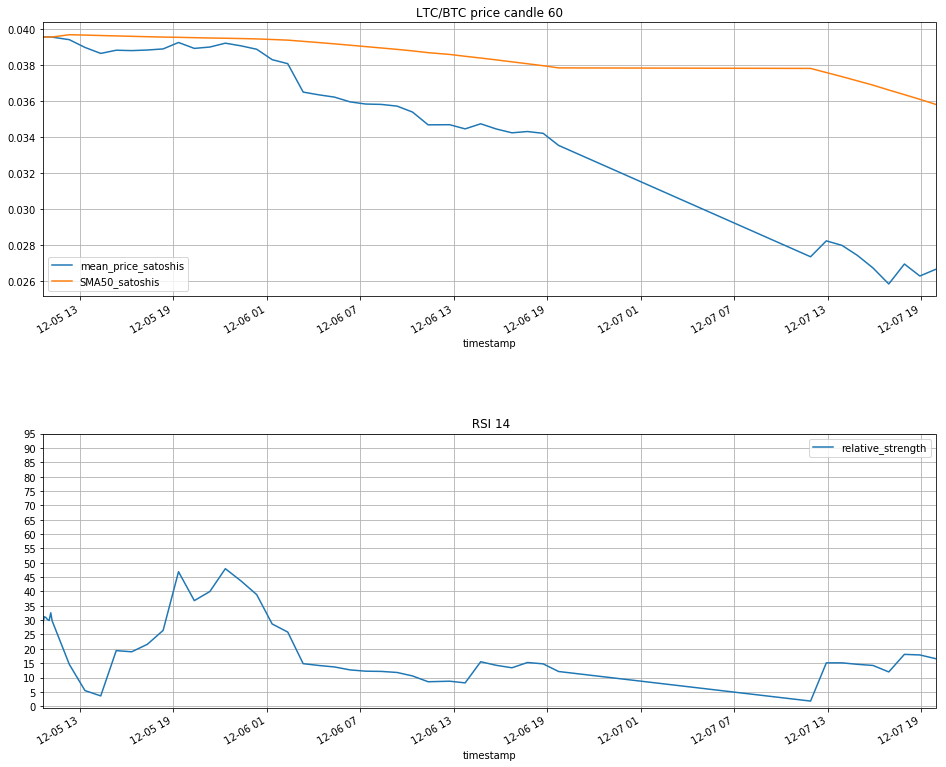

In [310]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(16,14))
fig.subplots_adjust(hspace=.5)

df_print[['mean_price_satoshis','SMA50_satoshis']].plot(ax=ax1, grid=True, title='LTC/BTC price candle 60')

df_print[['relative_strength']].plot(ax=ax2, yticks=range(0, 100, 5), grid=True, title=' RSI 14')

ax1.legend(loc=3)
plt.show()


In [145]:

db_connection.close()